In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_2018 = pd.read_csv('df_2018_total.csv')
data_2019 = pd.read_csv('df_2019_total.csv')
data_2020 = pd.read_csv('df_2020_total.csv')

/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 1. When are tickets most likely to be issued? Any seasonality?

In [3]:
am = []
pm = []
for val in data_2020['Violation Time'].dropna():
    if val[-1:] == 'A':
        am.append(val[-5:-1])
    else:
        pm.append(val[-5:-1])
        
# for i in am:
#     if int(i) > 1200 or int(i) < 0:
#         am.remove(i)

In [4]:
# for i in am:
#     print(int(i))
am = [number for number in am if number.isdigit()]
pm = [number for number in pm if number.isdigit()]

# pm = list(map(int, pm))
# pm
filtered_am = [number for number in am if int(number) <= 1200]
filtered_pm = [number for number in pm if int(number) <= 1200]

In [21]:
sizes_am = []
dic_am = {}
labels_am = ['24-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12']


for i in filtered_am:
    if (1 <= int(i) & int(i) <= 100):
        if '24-1' in dic_am:
            dic_am['24-1'] += 1
        else:
            dic_am['24-1'] = 1
    elif (101 <= int(i) & int(i) <= 200):
        if '1-2' in dic_am:
            dic_am['1-2'] += 1
        else:
            dic_am['1-2'] = 1
    elif (201 <= int(i) & int(i) <= 300):
        if '2-3' in dic_am:
            dic_am['2-3'] += 1
        else:
            dic_am['2-3'] = 1
    elif (301 <= int(i) & int(i) <= 400):
        if '3-4' in dic_am:
            dic_am['3-4'] += 1
        else:
            dic_am['3-4'] = 1
    elif (401 <= int(i) & int(i) <= 500):
        if '4-5' in dic_am:
            dic_am['4-5'] += 1
        else:    
            dic_am['4-5'] = 1
    elif (501 <= int(i) & int(i) <= 600):
        if '5-6' in dic_am:
            dic_am['5-6'] += 1
        else:
            dic_am['5-6'] = 1
    elif (601 <= int(i) & int(i) <= 700):
        if '6-7' in dic_am:
            dic_am['6-7'] += 1
        else:
            dic_am['6-7'] = 1
    elif (701 <= int(i) & int(i) <= 800):
        if '7-8' in dic_am:
            dic_am['7-8'] += 1
        else:
            dic_am['7-8'] = 1
    elif (801 <= int(i) & int(i) <= 900):
        if '8-9' in dic_am:
            dic_am['8-9'] += 1
        else:
            dic_am['8-9'] = 1
    elif (901 <= int(i) & int(i) <= 1000):
        if '9-10' in dic_am:
            dic_am['9-10'] += 1
        else:
            dic_am['9-10'] = 1
    elif (1001 <= int(i) & int(i) <= 1100):
        if '10-11' in dic_am:
            dic_am['10-11'] += 1
        else:
            dic_am['10-11'] = 1
    elif (1101 <= int(i) & int(i) <= 1200):
        if '11-12' in dic_am:
            dic_am['11-12'] += 1
        else:
            dic_am['11-12'] = 1

sizes_am = [(dic_am[val]/len(filtered_am)) for val in labels_am]            

plt.figure(figsize = (15,15))

# #fig1, ax1 = plt.subplots()
# plt.pie(sizes_am, 
#         labels=labels_am, 
#         wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#         textprops={'fontsize': 8},
#         pctdistance=0.85, 
#         autopct='%1.1f%%',
#         shadow=False, 
#         startangle=90, 
#         counterclock=False,
#         normalize=True)
# #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# plt.show()


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [20]:
sizes_pm = []
dic_pm = {}
labels_pm = ['12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']


for i in filtered_pm:
    if (1 <= int(i) & int(i) <= 100):
        if '12-13' in dic_pm:
            dic_pm['12-13'] += 1
        else:
            dic_pm['12-13'] = 1
    elif (101 <= int(i) & int(i) <= 200):
        if '13-14' in dic_pm:
            dic_pm['13-14'] += 1
        else:
            dic_pm['13-14'] = 1
    elif (201 <= int(i) & int(i) <= 300):
        if '14-15' in dic_pm:
            dic_pm['14-15'] += 1
        else:
            dic_pm['14-15'] = 1
    elif (301 <= int(i) & int(i) <= 400):
        if '15-16' in dic_pm:
            dic_pm['15-16'] += 1
        else:
            dic_pm['15-16'] = 1
    elif (401 <= int(i) & int(i) <= 500):
        if '16-17' in dic_pm:
            dic_pm['16-17'] += 1
        else:    
            dic_pm['16-17'] = 1
    elif (501 <= int(i) & int(i) <= 600):
        if '17-18' in dic_pm:
            dic_pm['17-18'] += 1
        else:
            dic_pm['17-18'] = 1
    elif (601 <= int(i) & int(i) <= 700):
        if '18-19' in dic_pm:
            dic_pm['18-19'] += 1
        else:
            dic_pm['18-19'] = 1
    elif (701 <= int(i) & int(i) <= 800):
        if '19-20' in dic_pm:
            dic_pm['19-20'] += 1
        else:
            dic_pm['19-20'] = 1
    elif (801 <= int(i) & int(i) <= 900):
        if '20-21' in dic_pm:
            dic_pm['20-21'] += 1
        else:
            dic_pm['20-21'] = 1
    elif (901 <= int(i) & int(i) <= 1000):
        if '21-22' in dic_pm:
            dic_pm['21-22'] += 1
        else:
            dic_pm['21-22'] = 1
    elif (1001 <= int(i) & int(i) <= 1100):
        if '22-23' in dic_pm:
            dic_pm['22-23'] += 1
        else:
            dic_pm['22-23'] = 1
    elif (1101 <= int(i) & int(i) <= 1200):
        if '23-24' in dic_pm:
            dic_pm['23-24'] += 1
        else:
            dic_pm['23-24'] = 1

sizes_pm = [(dic_pm[val]/len(filtered_pm)) for val in labels_pm]            

# plt.figure(figsize = (15,15))

# #fig1, ax1 = plt.subplots()
# plt.pie(sizes_pm, 
#         labels=labels_pm, 
#         wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#         textprops={'fontsize': 8},
#         pctdistance=0.85, 
#         autopct='%1.1f%%',
#         shadow=False, 
#         startangle=90, 
#         counterclock=False,
#         normalize=True)
# #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# plt.show()

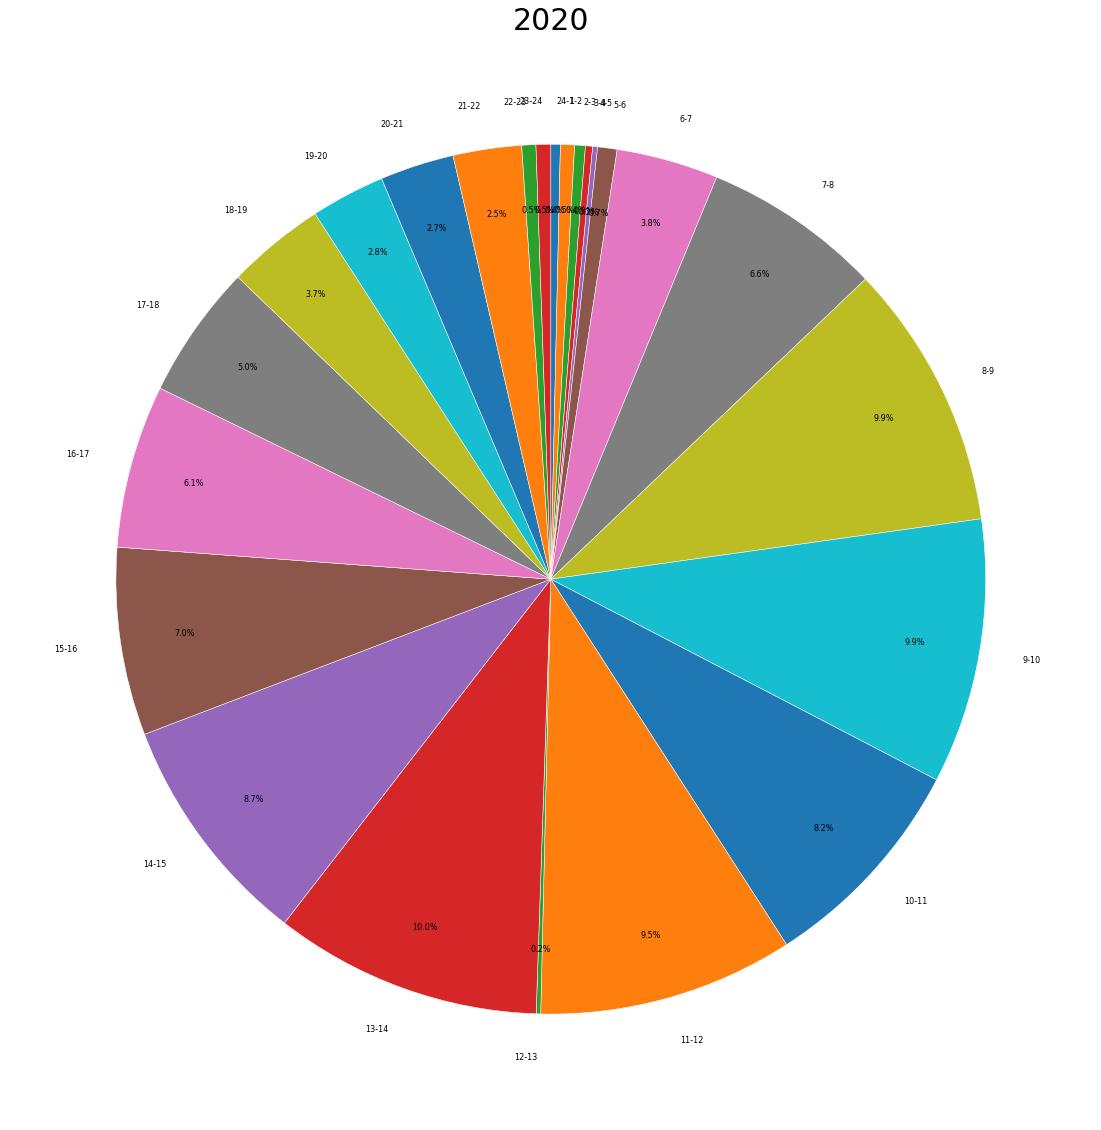

In [13]:
dic_all = {**dic_am, **dic_pm}
dic_all

labels_all = labels_am + labels_pm
labels_all

filtered_all = filtered_am + filtered_pm

sizes_all = [(dic_all[val]/len(filtered_all)) for val in labels_all]            

plt.figure(figsize = (20,20))

plt.title('2020', fontsize = 30)
plt.pie(sizes_all, 
        labels=labels_all, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
        textprops={'fontsize': 8},
        pctdistance=0.85, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90, 
        counterclock=False,
        normalize=True)

# fig1, ax1 = plt.subplots(figsize=(15,15))
# wdges, labels, autopct = ax1.pie(sizes_all,
#     labels=labels_all,
#     radius=1,
#     startangle=90,
#     counterclock=False,
#     shadow=False,
#     normalize=True,
#     wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#     textprops={'fontsize': 8},
#     pctdistance=0.85,
#     autopct='%1.1f%%')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [14]:
am = []
pm = []
for val in data_2019['Violation Time'].dropna():
    if val[-1:] == 'A':
        am.append(val[-5:-1])
    else:
        pm.append(val[-5:-1])
        
# for i in am:
#     if int(i) > 1200 or int(i) < 0:
#         am.remove(i)

In [15]:
# for i in am:
#     print(int(i))
am = [number for number in am if number.isdigit()]
pm = [number for number in pm if number.isdigit()]

# pm = list(map(int, pm))
# pm
filtered_am = [number for number in am if int(number) <= 1200]
filtered_pm = [number for number in pm if int(number) <= 1200]

In [19]:
sizes_am = []
dic_am = {}
labels_am = ['24-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12']


for i in filtered_am:
    if (1 <= int(i) & int(i) <= 100):
        if '24-1' in dic_am:
            dic_am['24-1'] += 1
        else:
            dic_am['24-1'] = 1
    elif (101 <= int(i) & int(i) <= 200):
        if '1-2' in dic_am:
            dic_am['1-2'] += 1
        else:
            dic_am['1-2'] = 1
    elif (201 <= int(i) & int(i) <= 300):
        if '2-3' in dic_am:
            dic_am['2-3'] += 1
        else:
            dic_am['2-3'] = 1
    elif (301 <= int(i) & int(i) <= 400):
        if '3-4' in dic_am:
            dic_am['3-4'] += 1
        else:
            dic_am['3-4'] = 1
    elif (401 <= int(i) & int(i) <= 500):
        if '4-5' in dic_am:
            dic_am['4-5'] += 1
        else:    
            dic_am['4-5'] = 1
    elif (501 <= int(i) & int(i) <= 600):
        if '5-6' in dic_am:
            dic_am['5-6'] += 1
        else:
            dic_am['5-6'] = 1
    elif (601 <= int(i) & int(i) <= 700):
        if '6-7' in dic_am:
            dic_am['6-7'] += 1
        else:
            dic_am['6-7'] = 1
    elif (701 <= int(i) & int(i) <= 800):
        if '7-8' in dic_am:
            dic_am['7-8'] += 1
        else:
            dic_am['7-8'] = 1
    elif (801 <= int(i) & int(i) <= 900):
        if '8-9' in dic_am:
            dic_am['8-9'] += 1
        else:
            dic_am['8-9'] = 1
    elif (901 <= int(i) & int(i) <= 1000):
        if '9-10' in dic_am:
            dic_am['9-10'] += 1
        else:
            dic_am['9-10'] = 1
    elif (1001 <= int(i) & int(i) <= 1100):
        if '10-11' in dic_am:
            dic_am['10-11'] += 1
        else:
            dic_am['10-11'] = 1
    elif (1101 <= int(i) & int(i) <= 1200):
        if '11-12' in dic_am:
            dic_am['11-12'] += 1
        else:
            dic_am['11-12'] = 1

sizes_am = [(dic_am[val]/len(filtered_am)) for val in labels_am]            

# plt.figure(figsize = (15,15))

# #fig1, ax1 = plt.subplots()
# plt.pie(sizes_am, 
#         labels=labels_am, 
#         wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#         textprops={'fontsize': 8},
#         pctdistance=0.85, 
#         autopct='%1.1f%%',
#         shadow=False, 
#         startangle=90, 
#         counterclock=False,
#         normalize=True)
# #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# #plt.show()



In [18]:
sizes_pm = []
dic_pm = {}
labels_pm = ['12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']


for i in filtered_pm:
    if (1 <= int(i) & int(i) <= 100):
        if '12-13' in dic_pm:
            dic_pm['12-13'] += 1
        else:
            dic_pm['12-13'] = 1
    elif (101 <= int(i) & int(i) <= 200):
        if '13-14' in dic_pm:
            dic_pm['13-14'] += 1
        else:
            dic_pm['13-14'] = 1
    elif (201 <= int(i) & int(i) <= 300):
        if '14-15' in dic_pm:
            dic_pm['14-15'] += 1
        else:
            dic_pm['14-15'] = 1
    elif (301 <= int(i) & int(i) <= 400):
        if '15-16' in dic_pm:
            dic_pm['15-16'] += 1
        else:
            dic_pm['15-16'] = 1
    elif (401 <= int(i) & int(i) <= 500):
        if '16-17' in dic_pm:
            dic_pm['16-17'] += 1
        else:    
            dic_pm['16-17'] = 1
    elif (501 <= int(i) & int(i) <= 600):
        if '17-18' in dic_pm:
            dic_pm['17-18'] += 1
        else:
            dic_pm['17-18'] = 1
    elif (601 <= int(i) & int(i) <= 700):
        if '18-19' in dic_pm:
            dic_pm['18-19'] += 1
        else:
            dic_pm['18-19'] = 1
    elif (701 <= int(i) & int(i) <= 800):
        if '19-20' in dic_pm:
            dic_pm['19-20'] += 1
        else:
            dic_pm['19-20'] = 1
    elif (801 <= int(i) & int(i) <= 900):
        if '20-21' in dic_pm:
            dic_pm['20-21'] += 1
        else:
            dic_pm['20-21'] = 1
    elif (901 <= int(i) & int(i) <= 1000):
        if '21-22' in dic_pm:
            dic_pm['21-22'] += 1
        else:
            dic_pm['21-22'] = 1
    elif (1001 <= int(i) & int(i) <= 1100):
        if '22-23' in dic_pm:
            dic_pm['22-23'] += 1
        else:
            dic_pm['22-23'] = 1
    elif (1101 <= int(i) & int(i) <= 1200):
        if '23-24' in dic_pm:
            dic_pm['23-24'] += 1
        else:
            dic_pm['23-24'] = 1

sizes_pm = [(dic_pm[val]/len(filtered_pm)) for val in labels_pm]            

# plt.figure(figsize = (15,15))

# #fig1, ax1 = plt.subplots()
# plt.pie(sizes_pm, 
#         labels=labels_pm, 
#         wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#         textprops={'fontsize': 8},
#         pctdistance=0.85, 
#         autopct='%1.1f%%',
#         shadow=False, 
#         startangle=90, 
#         counterclock=False,
#         normalize=True)
# #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# #plt.show()

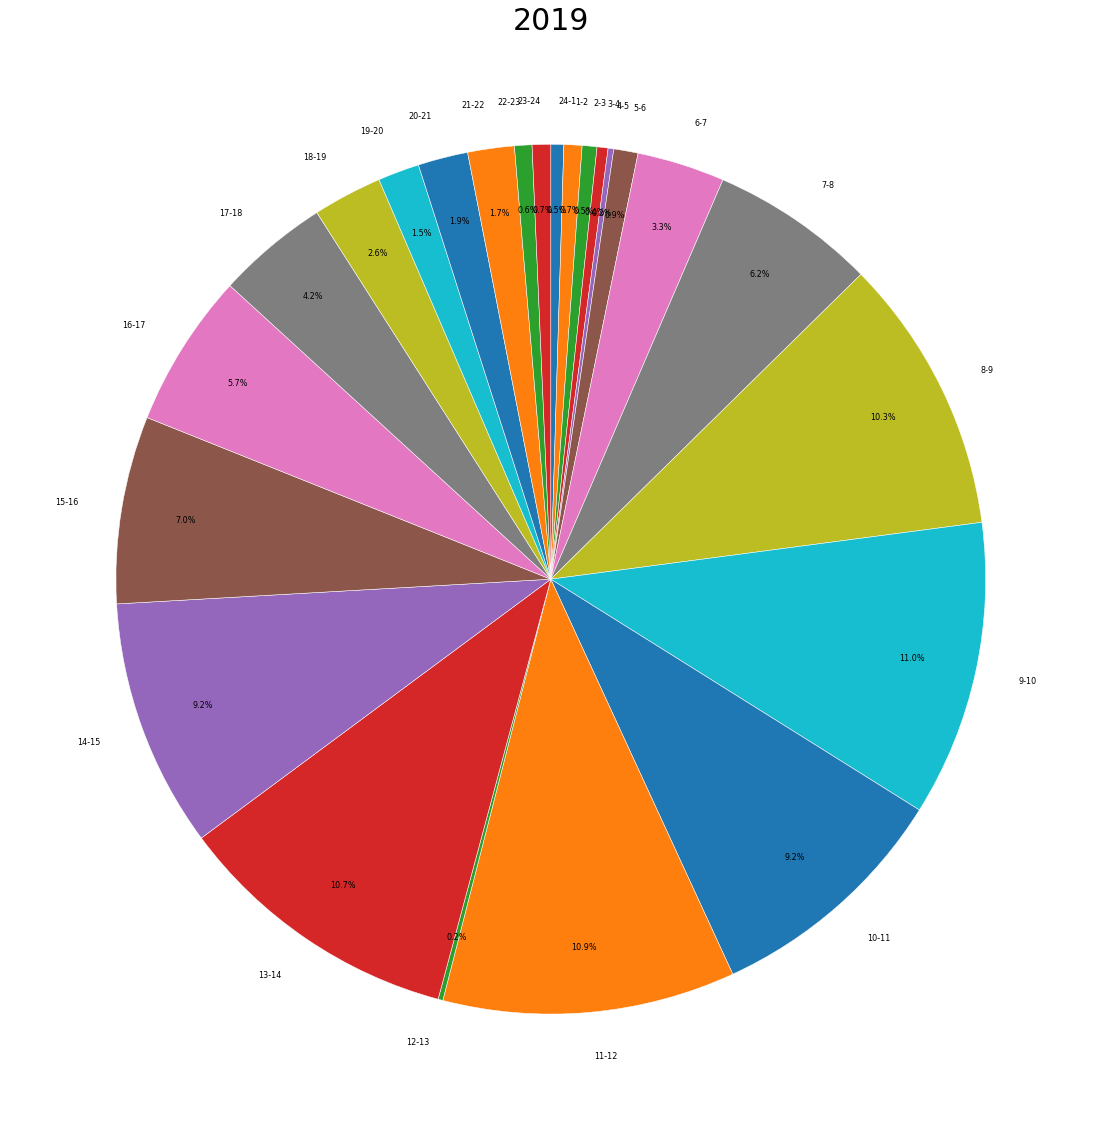

In [22]:
dic_all = {**dic_am, **dic_pm}
dic_all

labels_all = labels_am + labels_pm
labels_all

filtered_all = filtered_am + filtered_pm

sizes_all = [(dic_all[val]/len(filtered_all)) for val in labels_all]            

plt.figure(figsize = (20,20))

plt.title('2019', fontsize = 30)
plt.pie(sizes_all, 
        labels=labels_all, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
        textprops={'fontsize': 8},
        pctdistance=0.85, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90, 
        counterclock=False,
        normalize=True)

# fig1, ax1 = plt.subplots(figsize=(15,15))
# wdges, labels, autopct = ax1.pie(sizes_all,
#     labels=labels_all,
#     radius=1,
#     startangle=90,
#     counterclock=False,
#     shadow=False,
#     normalize=True,
#     wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#     textprops={'fontsize': 8},
#     pctdistance=0.85,
#     autopct='%1.1f%%')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [23]:
am = []
pm = []
for val in data_2018['Violation Time'].dropna():
    if val[-1:] == 'A':
        am.append(val[-5:-1])
    else:
        pm.append(val[-5:-1])
        
# for i in am:
#     if int(i) > 1200 or int(i) < 0:
#         am.remove(i)

In [24]:
# for i in am:
#     print(int(i))
am = [number for number in am if number.isdigit()]
pm = [number for number in pm if number.isdigit()]

# pm = list(map(int, pm))
# pm
filtered_am = [number for number in am if int(number) <= 1200]
filtered_pm = [number for number in pm if int(number) <= 1200]

In [25]:
sizes_am = []
dic_am = {}
labels_am = ['24-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12']


for i in filtered_am:
    if (1 <= int(i) & int(i) <= 100):
        if '24-1' in dic_am:
            dic_am['24-1'] += 1
        else:
            dic_am['24-1'] = 1
    elif (101 <= int(i) & int(i) <= 200):
        if '1-2' in dic_am:
            dic_am['1-2'] += 1
        else:
            dic_am['1-2'] = 1
    elif (201 <= int(i) & int(i) <= 300):
        if '2-3' in dic_am:
            dic_am['2-3'] += 1
        else:
            dic_am['2-3'] = 1
    elif (301 <= int(i) & int(i) <= 400):
        if '3-4' in dic_am:
            dic_am['3-4'] += 1
        else:
            dic_am['3-4'] = 1
    elif (401 <= int(i) & int(i) <= 500):
        if '4-5' in dic_am:
            dic_am['4-5'] += 1
        else:    
            dic_am['4-5'] = 1
    elif (501 <= int(i) & int(i) <= 600):
        if '5-6' in dic_am:
            dic_am['5-6'] += 1
        else:
            dic_am['5-6'] = 1
    elif (601 <= int(i) & int(i) <= 700):
        if '6-7' in dic_am:
            dic_am['6-7'] += 1
        else:
            dic_am['6-7'] = 1
    elif (701 <= int(i) & int(i) <= 800):
        if '7-8' in dic_am:
            dic_am['7-8'] += 1
        else:
            dic_am['7-8'] = 1
    elif (801 <= int(i) & int(i) <= 900):
        if '8-9' in dic_am:
            dic_am['8-9'] += 1
        else:
            dic_am['8-9'] = 1
    elif (901 <= int(i) & int(i) <= 1000):
        if '9-10' in dic_am:
            dic_am['9-10'] += 1
        else:
            dic_am['9-10'] = 1
    elif (1001 <= int(i) & int(i) <= 1100):
        if '10-11' in dic_am:
            dic_am['10-11'] += 1
        else:
            dic_am['10-11'] = 1
    elif (1101 <= int(i) & int(i) <= 1200):
        if '11-12' in dic_am:
            dic_am['11-12'] += 1
        else:
            dic_am['11-12'] = 1

sizes_am = [(dic_am[val]/len(filtered_am)) for val in labels_am]            

# plt.figure(figsize = (15,15))

# #fig1, ax1 = plt.subplots()
# plt.pie(sizes_am, 
#         labels=labels_am, 
#         wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#         textprops={'fontsize': 8},
#         pctdistance=0.85, 
#         autopct='%1.1f%%',
#         shadow=False, 
#         startangle=90, 
#         counterclock=False,
#         normalize=True)
# #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# #plt.show()




In [26]:
sizes_pm = []
dic_pm = {}
labels_pm = ['12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']


for i in filtered_pm:
    if (1 <= int(i) & int(i) <= 100):
        if '12-13' in dic_pm:
            dic_pm['12-13'] += 1
        else:
            dic_pm['12-13'] = 1
    elif (101 <= int(i) & int(i) <= 200):
        if '13-14' in dic_pm:
            dic_pm['13-14'] += 1
        else:
            dic_pm['13-14'] = 1
    elif (201 <= int(i) & int(i) <= 300):
        if '14-15' in dic_pm:
            dic_pm['14-15'] += 1
        else:
            dic_pm['14-15'] = 1
    elif (301 <= int(i) & int(i) <= 400):
        if '15-16' in dic_pm:
            dic_pm['15-16'] += 1
        else:
            dic_pm['15-16'] = 1
    elif (401 <= int(i) & int(i) <= 500):
        if '16-17' in dic_pm:
            dic_pm['16-17'] += 1
        else:    
            dic_pm['16-17'] = 1
    elif (501 <= int(i) & int(i) <= 600):
        if '17-18' in dic_pm:
            dic_pm['17-18'] += 1
        else:
            dic_pm['17-18'] = 1
    elif (601 <= int(i) & int(i) <= 700):
        if '18-19' in dic_pm:
            dic_pm['18-19'] += 1
        else:
            dic_pm['18-19'] = 1
    elif (701 <= int(i) & int(i) <= 800):
        if '19-20' in dic_pm:
            dic_pm['19-20'] += 1
        else:
            dic_pm['19-20'] = 1
    elif (801 <= int(i) & int(i) <= 900):
        if '20-21' in dic_pm:
            dic_pm['20-21'] += 1
        else:
            dic_pm['20-21'] = 1
    elif (901 <= int(i) & int(i) <= 1000):
        if '21-22' in dic_pm:
            dic_pm['21-22'] += 1
        else:
            dic_pm['21-22'] = 1
    elif (1001 <= int(i) & int(i) <= 1100):
        if '22-23' in dic_pm:
            dic_pm['22-23'] += 1
        else:
            dic_pm['22-23'] = 1
    elif (1101 <= int(i) & int(i) <= 1200):
        if '23-24' in dic_pm:
            dic_pm['23-24'] += 1
        else:
            dic_pm['23-24'] = 1

sizes_pm = [(dic_pm[val]/len(filtered_pm)) for val in labels_pm]            

# plt.figure(figsize = (15,15))

# #fig1, ax1 = plt.subplots()
# plt.pie(sizes_pm, 
#         labels=labels_pm, 
#         wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#         textprops={'fontsize': 8},
#         pctdistance=0.85, 
#         autopct='%1.1f%%',
#         shadow=False, 
#         startangle=90, 
#         counterclock=False,
#         normalize=True)
# #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# #plt.show()

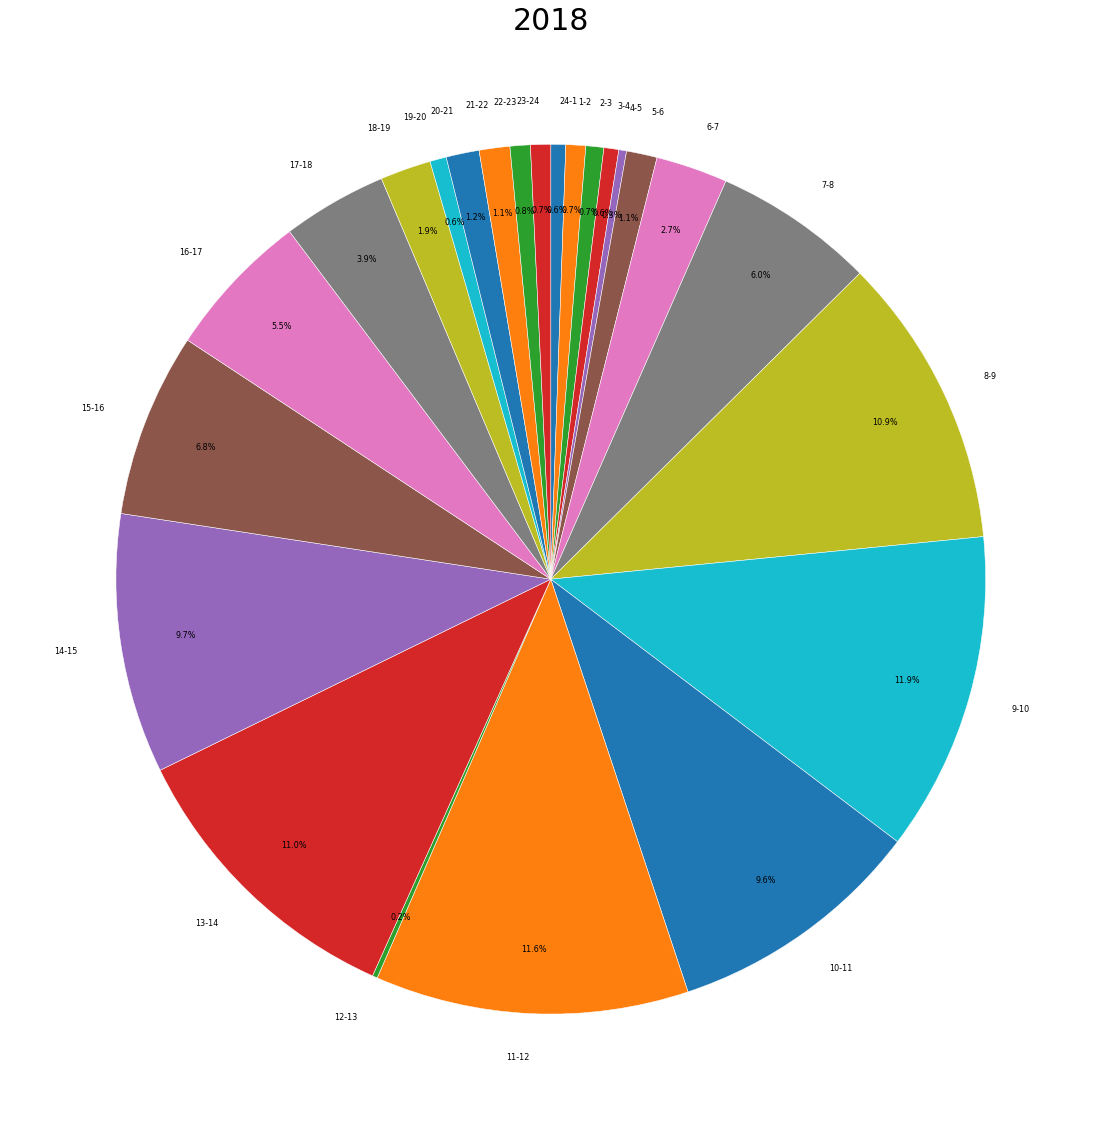

In [27]:
dic_all = {**dic_am, **dic_pm}
dic_all

labels_all = labels_am + labels_pm
labels_all

filtered_all = filtered_am + filtered_pm

sizes_all = [(dic_all[val]/len(filtered_all)) for val in labels_all]            

plt.figure(figsize = (20,20))

plt.title('2018', fontsize = 30)
plt.pie(sizes_all, 
        labels=labels_all, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
        textprops={'fontsize': 8},
        pctdistance=0.85, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90, 
        counterclock=False,
        normalize=True)

# fig1, ax1 = plt.subplots(figsize=(15,15))
# wdges, labels, autopct = ax1.pie(sizes_all,
#     labels=labels_all,
#     radius=1,
#     startangle=90,
#     counterclock=False,
#     shadow=False,
#     normalize=True,
#     wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
#     textprops={'fontsize': 8},
#     pctdistance=0.85,
#     autopct='%1.1f%%')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [28]:
from datetime import datetime
from dateutil import parser

In [29]:
time_series = pd.DataFrame(np.ones((len(data_2020),1)),index = pd.to_datetime(data_2020['Issue Date']))
time_series_gb =time_series.groupby(time_series.index).count()
time_series_gb.rename(columns={0:'Num of Violations'})

,Num of Violations
Issue Date,
2020-01-01,2114
2020-01-02,31555
2020-01-03,35762
2020-01-04,20612
2020-01-05,7182
...,...
2020-12-27,7326
2020-12-28,48567
2020-12-29,51154


,0
Issue Date,
2020-01-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-02-29,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-03-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-04-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-05-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-06-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-07-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-08-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-09-30,"AxesSubplot(0.125,0.125;0.775x0.755)"


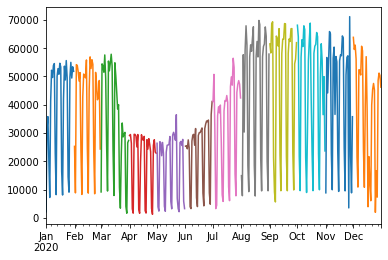

In [30]:
M_2020 = time_series.groupby(time_series.index).count().resample('M')
M_2020.plot()

In [31]:
time_series = pd.DataFrame(np.ones((len(data_2019),1)),index = pd.to_datetime(data_2019['Issue Date']))
time_series_gb =time_series.groupby(time_series.index).count()
time_series_gb.rename(columns={0:'Num of Violations'})

,Num of Violations
Issue Date,
2019-01-01,3694
2019-01-02,42828
2019-01-03,46578
2019-01-04,44527
2019-01-05,21335
...,...
2019-12-27,46226
2019-12-28,18918
2019-12-29,6749


,0
Issue Date,
2019-01-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-02-28,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-03-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-04-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-05-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-06-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-07-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-08-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-09-30,"AxesSubplot(0.125,0.125;0.775x0.755)"


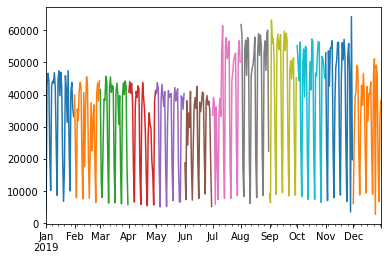

In [32]:
M_2019 = time_series.groupby(time_series.index).count().resample('M')
M_2019.plot()

In [33]:
time_series = pd.DataFrame(np.ones((len(data_2018),1)),index = pd.to_datetime(data_2018['Issue Date']))
time_series_gb =time_series.groupby(time_series.index).count()
time_series_gb.rename(columns={0:'Num of Violations'})

,Num of Violations
Issue Date,
2018-01-01,3623
2018-01-02,41003
2018-01-03,41785
2018-01-04,1845
2018-01-05,10671
...,...
2018-12-27,34630
2018-12-28,21261
2018-12-29,20101


,0
Issue Date,
2018-01-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-02-28,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-03-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-04-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-05-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-06-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-07-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-08-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-09-30,"AxesSubplot(0.125,0.125;0.775x0.755)"


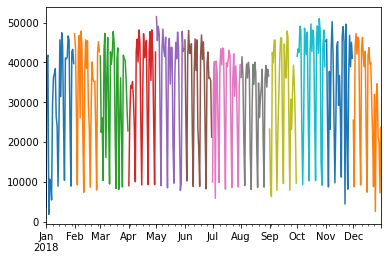

In [34]:
M_2018 = time_series.groupby(time_series.index).count().resample('M')
M_2018.plot()

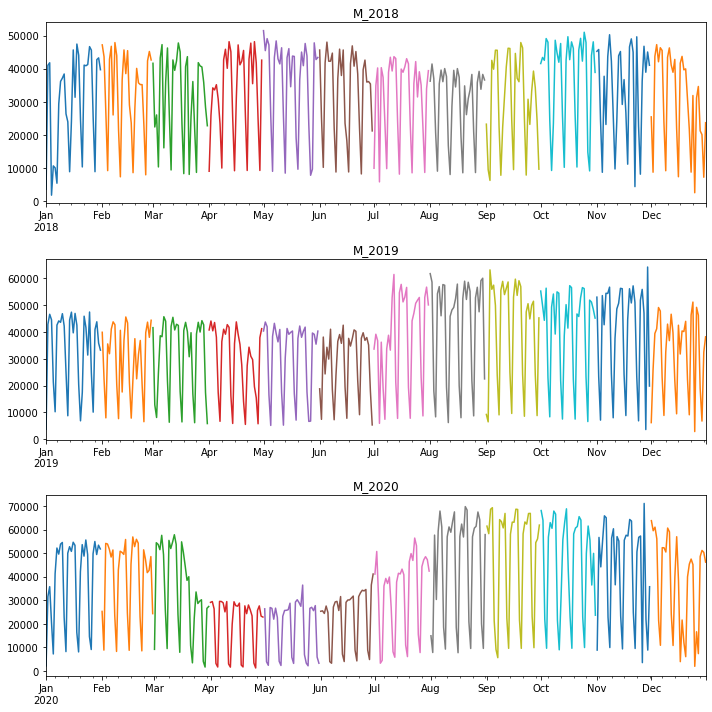

In [47]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(10,10))
lst = [M_2018,M_2019,M_2020]
lst_str = ['M_2018','M_2019','M_2020']

for i in range(3):
    plt.subplot(3,1,i+1)
    plt.title(lst_str[i])
    lst[i].plot()

plt.tight_layout()